# Tri Met Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [4]:
dftrip = pd.read_csv('trips_day.csv')
dfevent = pd.read_csv('events_day.csv')


In [5]:
df = pd.merge(dftrip, dfevent, on=['tripID', 'vehicle_id'])

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

In [9]:
df.head()

,tripID,vehicle_id,blockID,direction,garage,routeNumber,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,vehicle_location_longitude,vehicle_location_latitude
0,7126389,115,9040,0,ELMO,90,36,-154,2017-01-31 11:35:05,9821,5,9821,1,MAX Red Line to Airport,-122.801139,45.491778
1,7126389,201,9040,0,ELMO,90,36,-154,2017-01-31 11:35:05,9821,5,9821,1,MAX Red Line to Airport,-122.801139,45.491778
2,7126389,209,9040,0,ELMO,90,103,52,2017-01-31 12:00:15,8335,9,8336,10,MAX Red Line to Airport,-122.674350,45.517152
3,7126389,209,9040,0,ELMO,90,21,30,2017-01-31 12:00:50,8336,10,8337,11,MAX Red Line to Airport,-122.673368,45.518051
4,7126389,209,9040,0,ELMO,90,57,27,2017-01-31 12:05:22,8339,13,8340,14,MAX Red Line to Airport,-122.669638,45.527331


In [112]:
df1 = df[df['signMessageLong'].str.contains("Red")]

In [113]:
checky = df1.groupby('signMessageLong').count()
checky

,tripID,vehicle_id,blockID,direction,garage,routeNumber,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,vehicle_location_longitude,vehicle_location_latitude
signMessageLong,,,,,,,,,,,,,,,
MAX Red Line to Airport,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504
MAX Red Line to City Center & Beaverton,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694


Text(0,0.5,'Delay')

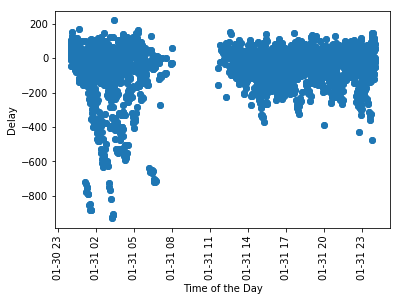

In [118]:
plt.plot_date(x="timestamp", y="delay", data=df1)
plt.xticks(rotation=90)
plt.xlabel('Time of the Day')
plt.ylabel('Delay')


Text(0,0.5,'Delay Amount')

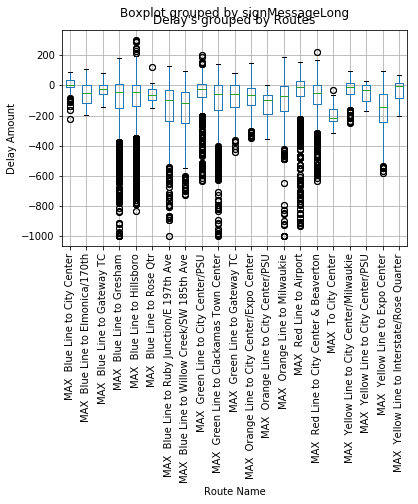

In [12]:
df.boxplot(column = 'delay', by = 'signMessageLong')
plt.xticks(rotation=90)
plt.title('Delay\'s grouped by Routes')
plt.xlabel('Route Name')
plt.ylabel('Delay Amount')

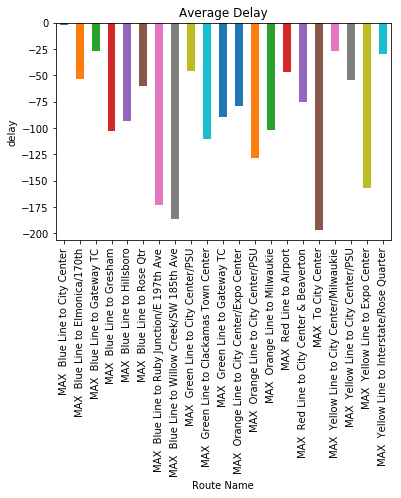

In [116]:
df.groupby('signMessageLong').delay.mean().plot(kind = "bar")
plt.xlabel('Route Name')
plt.ylabel('delay')
plt.title('Average Delay');

In [1]:
df1.hist(column = 'delay', by = 'signMessageLong' )
plt.xticks(rotation=90)
plt.xlabel('Delay in Seconds')
plt.ylabel('Delay Amount')

NameError: name 'df1' is not defined

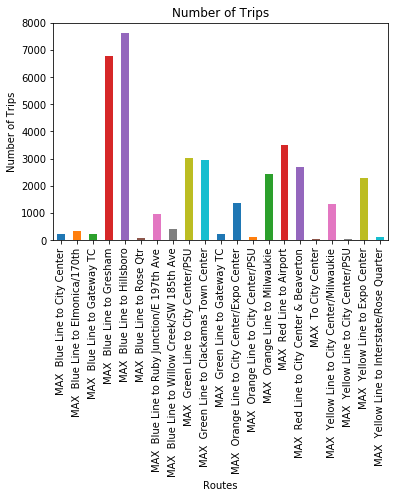

In [122]:
df.groupby('signMessageLong').tripID.count().plot(kind = "bar")
plt.xlabel('Routes')
plt.ylabel('Number of Trips')
plt.title('Number of Trips');